In [2]:
import torch
import matplotlib.pyplot as plt

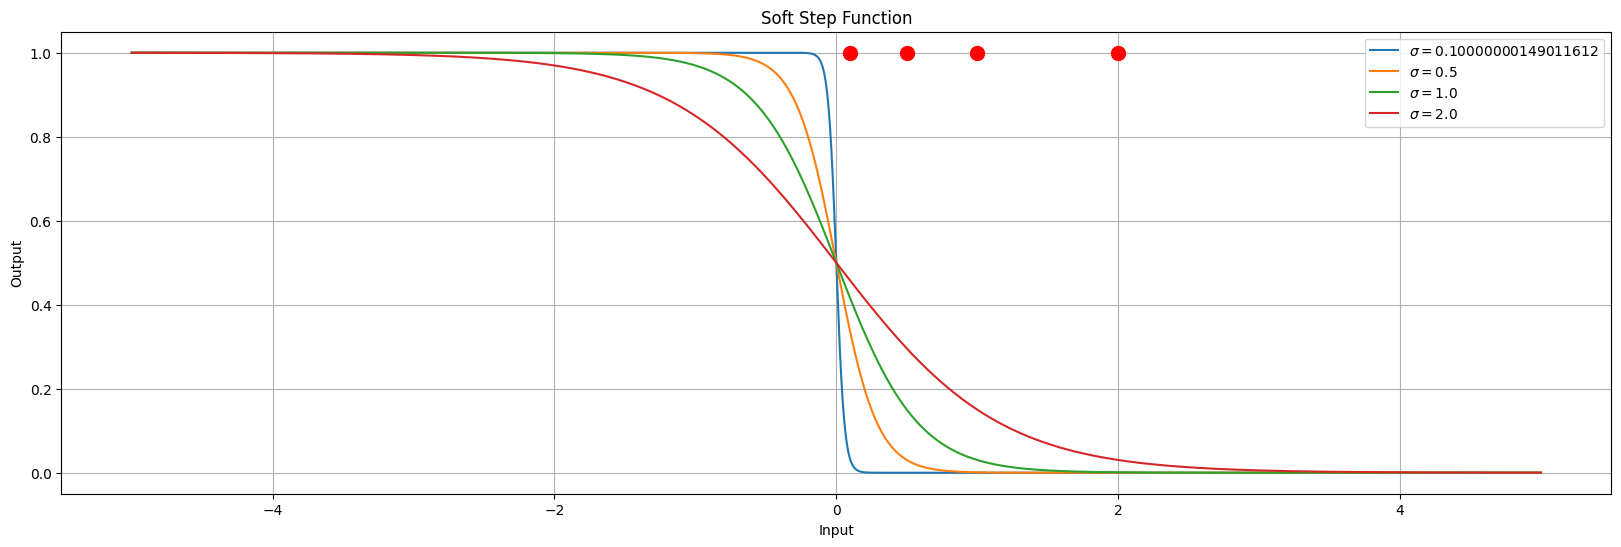

In [4]:
sp = torch.linspace(-5, 5, 1000)
sigmas = torch.tensor([0.1, 0.5, 1.0, 2.0])
figure = plt.figure(figsize=(20, 6), dpi=100)
for sigma in sigmas:
    gelu = 0.5 * (1 + torch.tanh((-sp / sigma * (3**0.5))))
    gelu = gelu.cpu().numpy()
    plt.plot(sp.cpu().numpy(), gelu, label=f"$\sigma={sigma}$")
    plt.scatter([sigma], [1], color="red", s=100, zorder=5)
plt.title("Soft Step Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid()
plt.show()